# Guía de Sistemas Discretos: Ejercicio 11
## Análisis de Señales y Sistemas Digitales

### Grupo 2
* Francois, Matías
* Gaytan, Joaquín Oscar
* Kammann, Lucas Agustín
* Maselli, Carlos Javier
* Trozzo, Rafael Nicolás

---------------------------------

![title](ejercicio_11.png)

### Obtención de la respuesta en frecuencia
Se desea obtener la ganancia en régimen permanente, para lo cual se busca la respuesta en frecuencia ya que establece el vínculo entre amplitudes y fases de entrada a salida en función de la frecuencia de la señal de entrada. Para poder hallarla existen diferentes mecanismo, en primer lugar se podría obtener la ecuación a diferencias y a partir de ella encontrar la respuesta impulsiva y aplicando la serie de superposición hallar la salida ante una entrada $ x(n) = e^{j \cdot w \cdot n} $.

Por otro lado, puede simplemente analizarse la ecuación en diferencias con esa entrada directamente y ver cómo es la salida. O bien, podría analizarse desde el dominio de la transformada Z y establenciendo las condiciones de causalidad y bibo-estabilidad, se podría encontrar $H(jw) = H(z = e^{j \cdot w \cdot n})$.

### Ecuación en diferencias
\begin{equation}
    y(n) = 0.4 \cdot x(n) + 0.4 \cdot y(n - 1)
\end{equation}

### Respuesta en frecuencia
Para buscar la respuesta en frecuencia se aplica la definición de la misma, por lo cual se aplica una entrada $x(n) = e^{j \cdot \omega \cdot n \cdot T}$.

\begin{align*}
    y(0) &= 0.4 \\
    y(1) &= 0.4 \cdot e^{j \cdot \omega \cdot T} + 0.4^{2} \\
    y(2) &= 0.4 \cdot e^{j \cdot 2 \omega \cdot T} + 0.4^{2} \cdot e^{j \cdot \omega \cdot T} + 0.4^{3} \\
    & \Rightarrow y(n) = \sum_{k = 0}^{n} (0.4)^{k + 1} \cdot e^{j \cdot (n - k) \cdot \omega \cdot T}
\end{align*}

\begin{align*}
    y(n) &= 0.4 \cdot e^{j \cdot n \cdot \omega \cdot T} \cdot \sum_{k = 0}^{n} (0.4)^{k} \cdot e^{-k \cdot j \cdot \omega \cdot T} \\
    &= 0.4 \cdot e^{j \cdot n \cdot \omega \cdot T} \cdot \sum_{k = 0}^{n} (0.4 \cdot e^{-j \cdot \omega \cdot T})^{k}
\end{align*}

Luego, recordando que en la definici\'on la respuesta en frecuencia corresponde a los autovalores resultantes de aplicar el sistema sobre dicha entrada, como se puede observar que la misma forma de $x(n)$ se encuentra, luego se define $y(n) = x(n) \cdot H(j \cdot \omega \cdot T) \Rightarrow H_n(\omega) = 0.4  \cdot \sum_{k = 0}^{n} (0.4 \cdot e^{-j \cdot \omega \cdot T})^{k}$.

\begin{align*}
    \lim_{n \rightarrow \infty} H_n( \omega ) = \frac{0.4}{1 - 0.4 \cdot e^{-j \cdot \omega \cdot T}} = \frac{0.4 \cdot e^{j \cdot \omega \cdot T}}{e^{j \cdot \omega \cdot T} - 0.4}
\end{align*}}

\begin{equation}
    |H(w)| [dB] = 20 \cdot \log{\left(\frac{0.4}{\sqrt{(cos(\omega \cdot T) - 0.4)^{2} + (sen(\omega \cdot T))^{2}}}\right)}
\end{equation}

### Frecuencia de Corte
Para encontrar la frecuencia a la cual la ganancia respecto del valor de banda pasante, o continuo, cae 3dB. Para ello primero obtenemos el valor para ganancia o banda pasante.

\begin{equation}
    |H(0)| [dB] = -3.52dB \Longrightarrow |H(\omega_c)| [dB] = -6.52dB \Longrightarrow 1 + (0.4)^{2} - \left(\frac{0.4}{10^{\frac{-6.52}{20}}}\right)^{2} = 0.8 \cdot cos(\omega_c \cdot T)
\end{equation}

\begin{equation}
    f_c = 156.90Hz
\end{equation}

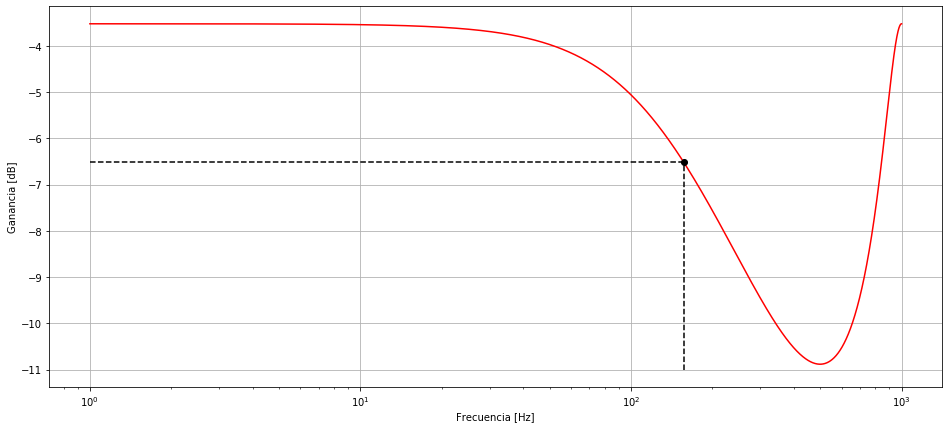

In [1]:
from numpy import pi, cos, sin, arange, sqrt, log10
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (16,7)

# Evaluando la respuesta en frecuencia del sistema
frequencies = arange(1, 1000, 1 / 1000)
response = 20 * log10(0.4 / sqrt( (cos(2 * pi * frequencies * 1e-3) - 0.4)**2 + (sin(2 * pi * frequencies * 1e-3))**2 ))

# Granficandola...
pyplot.semilogx(frequencies, response, 'r')
pyplot.plot([156.90], [-6.52], marker='o', color='black')
pyplot.plot([1, 156.90], [-6.52, -6.52], linestyle='dashed', color='black')
pyplot.plot([156.90, 156.90], [-11, -6.52], linestyle='dashed', color='black')
pyplot.ylabel('Ganancia [dB]')
pyplot.xlabel('Frecuencia [Hz]')
pyplot.grid()
pyplot.show()

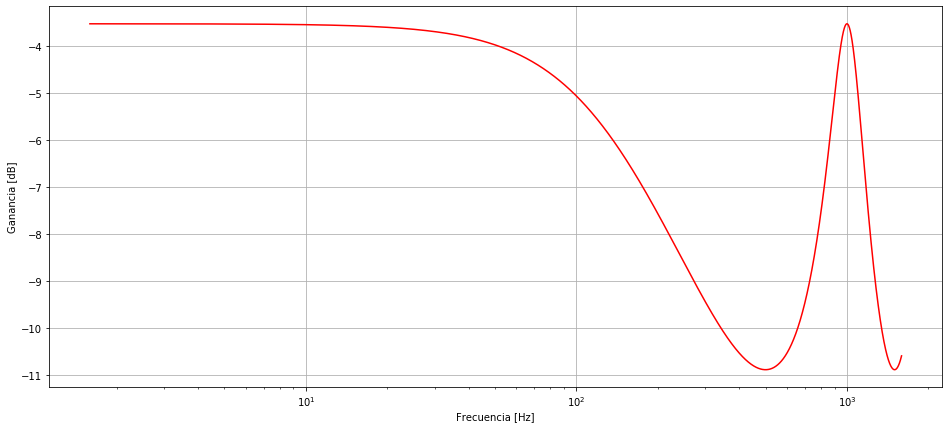

In [2]:
from scipy import signal

# Voy a realizar los mismos gráficos que antes pero utilizando
# los módulos para este propósito que ya tiene Python a modo de verificación
transfer = signal.dlti([0.4, 0], [1, -0.4], dt=0.001)
omega, mag, phase = transfer.bode(arange(0.01, 10, 1 / 1000))

pyplot.semilogx([frequency / (2 * pi) for frequency in omega], mag, 'r')
pyplot.ylabel('Ganancia [dB]')
pyplot.xlabel('Frecuencia [Hz]')
pyplot.grid()
pyplot.show()